# Brain Tumor Detection Model Training Notebook

This notebook provides a step-by-step guide to train an ML model for brain tumor detection. It covers data loading, preprocessing, model building, training, and evaluation.

---

## Step 1: Import required libraries

In this step, we import all essential Python libraries needed for loading images, processing them, and building the model.




In [1]:

import os
os.system('pip install tensorflow numpy matplotlib scikit-learn')


import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential



---

## Step 2: Define dataset directory and parameters

Here, specify the path where the Kaggle dataset is stored on your machine. Also, define image size and number of classes.



In [2]:
import os

# Path for train and test folders (update if your folder names are different)
TRAIN_DIR = '../data/Training'     # Path to Training folder
TEST_DIR = '../data/Testing'       # Path to Testing folder

IMAGE_SIZE = 128

# Print classes in the Training/Testing directory (should be like: glioma, meningioma, pituitary, no_tumor)
train_classes = os.listdir(TRAIN_DIR)
test_classes = os.listdir(TEST_DIR)
print("Train Classes:", train_classes)
print("Test Classes:", test_classes)


Train Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']
Test Classes: ['glioma', 'meningioma', 'notumor', 'pituitary']



---

## Step 3: Create a data loading function

This function reads the dataset, resizes each image, normalizes pixel values (to range 0-1), and one-hot encodes the labels.



In [6]:
# Step 3: Data Loading Function for This Structure

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np

def load_data_from_directory(data_dir, image_size=128):
    classes = sorted(os.listdir(data_dir))  # sorted so label indices are consistent
    images = []
    labels = []

    for idx, cls in enumerate(classes):
        class_dir = os.path.join(data_dir, cls)
        if not os.path.isdir(class_dir):
            continue  # Skip any files, only process folders
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            try:
                img = load_img(img_path, target_size=(image_size, image_size))
                img = img_to_array(img) / 255.0
                images.append(img)
                labels.append(idx)
            except Exception as e:
                print("Failed to process image:", img_path, "Error:", e)

    images = np.array(images)
    labels = to_categorical(labels, num_classes=len(classes))
    return images, labels, classes

# Load training data
X_train, y_train, class_names = load_data_from_directory(TRAIN_DIR, IMAGE_SIZE)
print("Loaded training images:", X_train.shape)
print("Class labels:", class_names)

# Load test data
X_test, y_test, _ = load_data_from_directory(TEST_DIR, IMAGE_SIZE)
print("Loaded test images:", X_test.shape)


Loaded training images: (5712, 128, 128, 3)
Class labels: ['glioma', 'meningioma', 'notumor', 'pituitary']
Loaded test images: (1311, 128, 128, 3)


Building the CNN Model

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def build_model(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3,3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2,2),

        Conv2D(64, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Conv2D(128, (3,3), activation='relu'),
        MaxPooling2D(2,2),

        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3)
num_classes = len(class_names)
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


d:\ml projects\brain_tumor_ml\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,156 (12.61 MB)

 Trainable params: 3,305,156 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [8]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=32
)


Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 22s 114ms/step - accuracy: 0.7062 - loss: 0.6978 - val_accuracy: 0.7719 - val_loss: 0.5616
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 115ms/step - accuracy: 0.8423 - loss: 0.4086 - val_accuracy: 0.8246 - val_loss: 0.3936
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 21s 116ms/step - accuracy: 0.8920 - loss: 0.2971 - val_accuracy: 0.8658 - val_loss: 0.3139
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 111ms/step - accuracy: 0.9182 - loss: 0.2228 - val_accuracy: 0.9191 - val_loss: 0.2069
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 20s 109ms/step - accuracy: 0.9366 - loss: 0.1704 - val_accuracy: 0.9230 - val_loss: 0.2126
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 23s 128ms/step - accuracy: 0.9517 - loss: 0.1409 - val_accuracy: 0.9214 - val_loss: 0.1990
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 26s 144ms/step - accuracy: 0.9596 - loss: 0.1148 - val_accuracy: 0.9359 - val_loss: 0.1608
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 25s 140ms/step - accuracy: 0.9634 - loss: 0

Saving  the Trained Model

In [9]:
model.save('../models/brain_tumor_model.h5')  # Adjust path as needed


 Plot Accuracy Curve

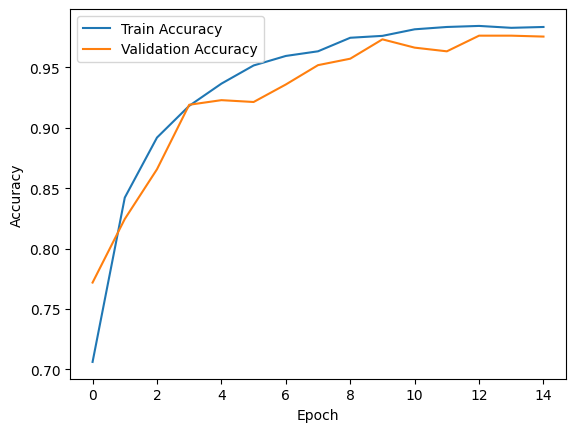

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Evaluating your model’s performance on the unseen test data

In [11]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9756 - loss: 0.1145
Test Accuracy: 0.9756
Test Loss: 0.1145


Generating Confusion Matrix and Classification Report

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict class indices for test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:\n", cm)

# Classification report
report = classification_report(y_true, y_pred_classes, target_names=class_names)
print("Classification Report:\n", report)


41/41 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step
Confusion Matrix:
 [[286  14   0   0]
 [  7 291   6   2]
 [  1   0 404   0]
 [  1   1   0 298]]
Classification Report:
               precision    recall  f1-score   support

      glioma       0.97      0.95      0.96       300
  meningioma       0.95      0.95      0.95       306
     notumor       0.99      1.00      0.99       405
   pituitary       0.99      0.99      0.99       300

    accuracy                           0.98      1311
   macro avg       0.97      0.97      0.97      1311
weighted avg       0.98      0.98      0.98      1311

